# Multiple Linear Regression
 
Single Target Mutiple Predictors

# 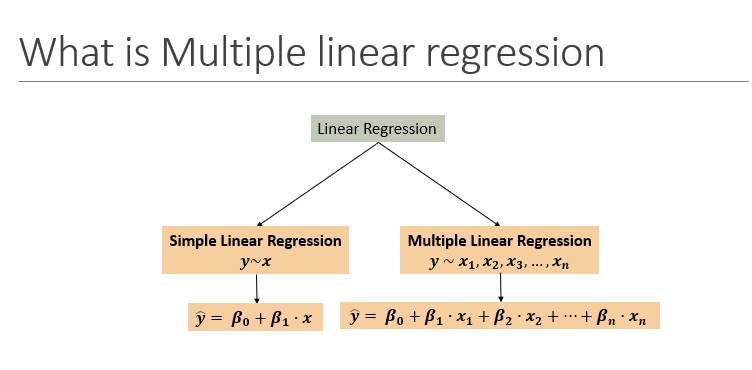

# Step 1 - Data Ingestion

In [15]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# PROFIT ~ RND, ADMIN, MKT
# PROFIT_pred = B0 + B1 x RND + B2 x ADMIN + B3 x MKT
# Step 2 - Perform Basic Data quality checks

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

# Step 3 - Visualize data

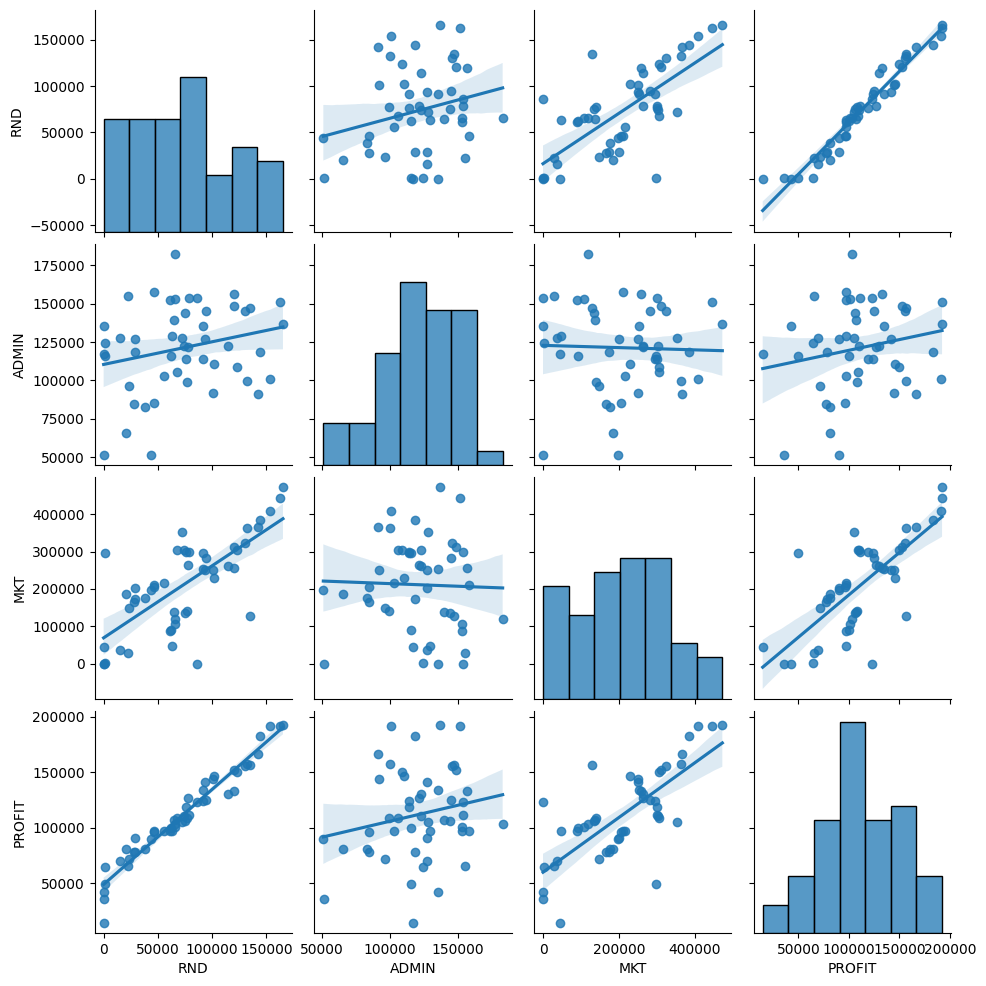

In [19]:
import seaborn as sns
sns.pairplot(df, kind="reg")

In [20]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# Step 4 - Seperate X (RND, ADMIN, MKT) , Y(PROFIT)

In [21]:
X = df[["RND", "ADMIN", "MKT"]]
Y = df[["PROFIT"]]

In [22]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [23]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 5- Create a LinearReg model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [26]:
model.intercept_

array([50122.19298987])

In [27]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [28]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

# PROFIT_Pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT

1. If RND increase by 1 unit Profit will increase by 0.8057 units
2. If ADMIN increase by 1 unit Profit will decrease by 0.0268 units
3. If MKT incrases by 1 unit Profit will increase by 0.0272 units

# From Above results RND is having most impact here becuse it has highest coefficient

In [29]:
# R2 score for model
model.score(X, Y)

0.9507459940683246

# Model Evaluation

In [30]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [31]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [32]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [33]:
from warnings import filterwarnings
filterwarnings("ignore")

In [34]:
def evaluate_model(model, x, y):
    # Predict the result
    ypred = model.predict(x)
    # Calulate metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [35]:
evaluate_model(model, X, Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


# From above metrics this model is good as R2 > 80%

# Out of sample prediction

In [36]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [37]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [38]:
def predict_profit(model, rnd, admin, mkt):
    xnew = [[rnd, admin, mkt]]
    pred = model.predict(xnew)
    return pred

In [39]:
predict_profit(model, rnd=1_00_000, admin= 50_000, mkt= 60_000)

array([[130986.58344975]])

In [40]:
predict_profit(model, rnd = 40_000, admin= 50_000, mkt = 1_00_000)

array([[83732.80304684]])

In [41]:
predict_profit(model, rnd=1_50_000, admin= 60_000, mkt= 60_000)

array([[171004.17626159]])